## Problem Statement

Recently, the Ames Real Estate Company has made rapid advances in marketing and property acquisition. To help better support their agents, this project is aimed at creating a linear regression model that can better predict property values based on certain attributes. In preparation for building my model, I will be using correlation analysis to identify all features that are highly correlated with our target variable of Sale Price. Additionally, I will be using regularization techniques such as Ridge and Lasso to reduce the impact of irrelevant features. I will be using Mean Squared Error and R2 score to evaluate the model's performance compared to baseline. From this, there will be an increase in the profits for the stakeholders of the company, and increase in customer satisfaction and company credibility.

## Data Import and Cleaning

In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn import preprocessing

In [2]:
# read in train dataset
train = pd.read_csv('../datasets/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
train.shape

(2051, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
# Converting columns data types: Id, PID, MS SubClass

train['Id'] = train['Id'].astype(str)
train['PID'] = train['PID'].astype(str)
train['MS SubClass'] = train['MS SubClass'].astype(str)

In [6]:
# How to display all rows from dataframe derived from https://www.geeksforgeeks.org/how-to-display-all-rows-from-dataframe-using-pandas/#
pd.set_option('display.max_rows', None)

In [7]:
# Drop the columns that have very little usable data
train.drop(columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], inplace=True)

train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,59,0,0,0,0,0,3,2010,WD,138500


## Select Numerical Columns

In [8]:
# derived from https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas

# Select numerical columns and set as an index list
numerical = train.select_dtypes(include='number').columns
numerical

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [9]:
# check numerical for nulls
train[numerical].isnull().sum().sort_values(ascending=False)

Lot Frontage       330
Garage Yr Blt      114
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Garage Cars          1
Garage Area          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Open Porch SF        0
Wood Deck SF         0
Yr Sold              0
Enclosed Porch       0
3Ssn Porch           0
Mo Sold              0
Fireplaces           0
Pool Area            0
Misc Val             0
Screen Porch         0
Half Bath            0
TotRms AbvGrd        0
Kitchen AbvGr        0
Bedroom AbvGr        0
Lot Area             0
Full Bath            0
Gr Liv Area          0
Low Qual Fin SF      0
2nd Flr SF           0
1st Flr SF           0
Year Remod/Add       0
Year Built           0
Overall Cond         0
Overall Qual         0
SalePrice            0
dtype: int64

## Apply Function to Fill NaN for Numerical

In [10]:
def fill_numerical(df):
    # Fill Lot Frontage by average per type of residential zone
    df["Lot Frontage"] = df.groupby("MS Zoning")["Lot Frontage"].transform(lambda x: x.fillna(x.mean()))
    
    # NaN indicates no garage, so set to 0
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
    df['Garage Cars'] = df['Garage Cars'].fillna(0)
    df['Garage Area'] = df['Garage Area'].fillna(0)
    
    #NaN indicates no feature, so set to 0
    df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
    df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0)
    df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)
    df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
    df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0)
    df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(0)
    df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(0)
    
    return df
    
fill_numerical(train)

train[numerical].isnull().sum().sort_values(ascending=False)

Lot Frontage       0
Lot Area           0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
Bedroom AbvGr      0
Half Bath          0
Full Bath          0
BsmtFin SF 2       0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
Bsmt Unf SF        0
Bsmt Half Bath     0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
SalePrice          0
dtype: int64

## Select categorical columns

In [11]:
# Select categorical columns and set as an index list
categorical = train.select_dtypes(include='object').columns
categorical

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

In [12]:
train[categorical].isnull().sum().sort_values(ascending=False)

Garage Cond       114
Garage Qual       114
Garage Finish     114
Garage Type       113
Bsmt Exposure      58
BsmtFin Type 2     56
Bsmt Qual          55
Bsmt Cond          55
BsmtFin Type 1     55
Mas Vnr Type       22
Heating             0
Foundation          0
Id                  0
Heating QC          0
Exter Cond          0
Electrical          0
Kitchen Qual        0
Functional          0
Paved Drive         0
Central Air         0
Exter Qual          0
PID                 0
Land Slope          0
MS SubClass         0
MS Zoning           0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Neighborhood        0
Exterior 2nd        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Sale Type           0
dtype: int64

## Apply Function to Fill NaN for Categorical

In [13]:
# Create a function fill NaN values for categorical columns 

def fill_categorical(df):
    # NaN indicates no garage
    df['Garage Cond'] = df['Garage Cond'].fillna('None')
    df['Garage Qual'] = df['Garage Qual'].fillna('None')
    df['Garage Finish'] = df['Garage Finish'].fillna('None')
    df['Garage Type'] = df['Garage Type'].fillna('None')
    
    # NaN indicates non-existence of feature
    df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('None')
    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna('None')
    df['Bsmt Qual'] = df['Bsmt Qual'].fillna('None')
    df['Bsmt Cond'] = df['Bsmt Cond'].fillna('None')
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna('None')
    df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
    
    return df
    
fill_categorical(train)

train[categorical].isnull().sum().sort_values(ascending=False)

Id                0
PID               0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Exter Cond        0
Exter Qual        0
Mas Vnr Type      0
Land Slope        0
MS SubClass       0
MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Neighborhood      0
Exterior 2nd      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Sale Type         0
dtype: int64

## Using IQR for Handling Outliers 

In [14]:
# derived from https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/
# and https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/

def clean_outliers(column):
    
    # fill all NaN values of a column with the mean value of the column
    column = column.fillna(column.mean())
    
    # Set q1 equal to the .25 percentile
    q1 = column.quantile(0.25)
    # Set q3 equal to the .75 percentile
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    
    # Set the lower and upper limits for range of accepted values
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    column[(column >= lower_limit) & (column <= upper_limit)]
    
    column = column.astype(float) 
    
    return column


In [15]:
# Apply to clean outliers from only numerical columns

numerical_col_list = list(numerical)
    
for col in numerical_col_list:
    train[col] = clean_outliers(train[col])


In [16]:
train[numerical].isnull().sum()

Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

## EDA Visualizations

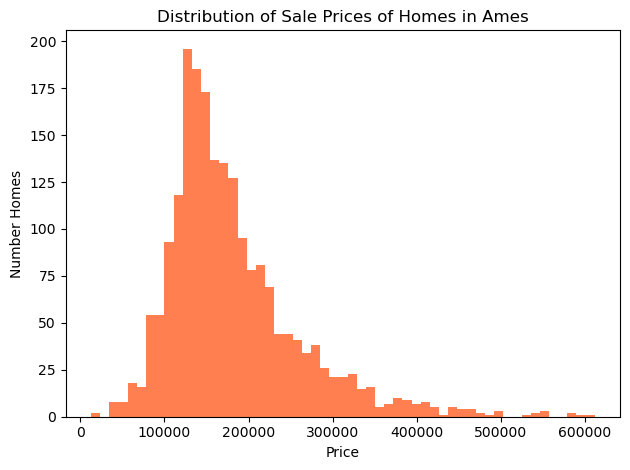

In [17]:
# Sale Price Distribution Histogram
plt.hist(train['SalePrice'], color = 'coral', bins = 55)
plt.title('Distribution of Sale Prices of Homes in Ames')
plt.ylabel('Number Homes')
plt.xlabel('Price');

plt.tight_layout()
plt.savefig('../imgs/sale_price_dist.png')

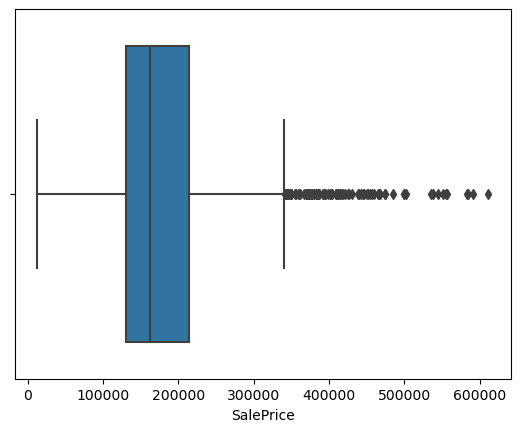

In [18]:
# Boxplot for SalePrice to check for outliers
sns.boxplot(x = train['SalePrice']);

The Histogram and Boxplot for our SalePrice both suggest that our data is **skewed right.** Most of the outliers for SalePrice are for the higher prices. 

This suggests that there might be *bias* present in the data, influenced by these higher priced homes.

---

## Heatmap for all Predictors

C:\Users\Jason Lu\AppData\Local\Temp\ipykernel_21248\2828242395.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr().round(2)


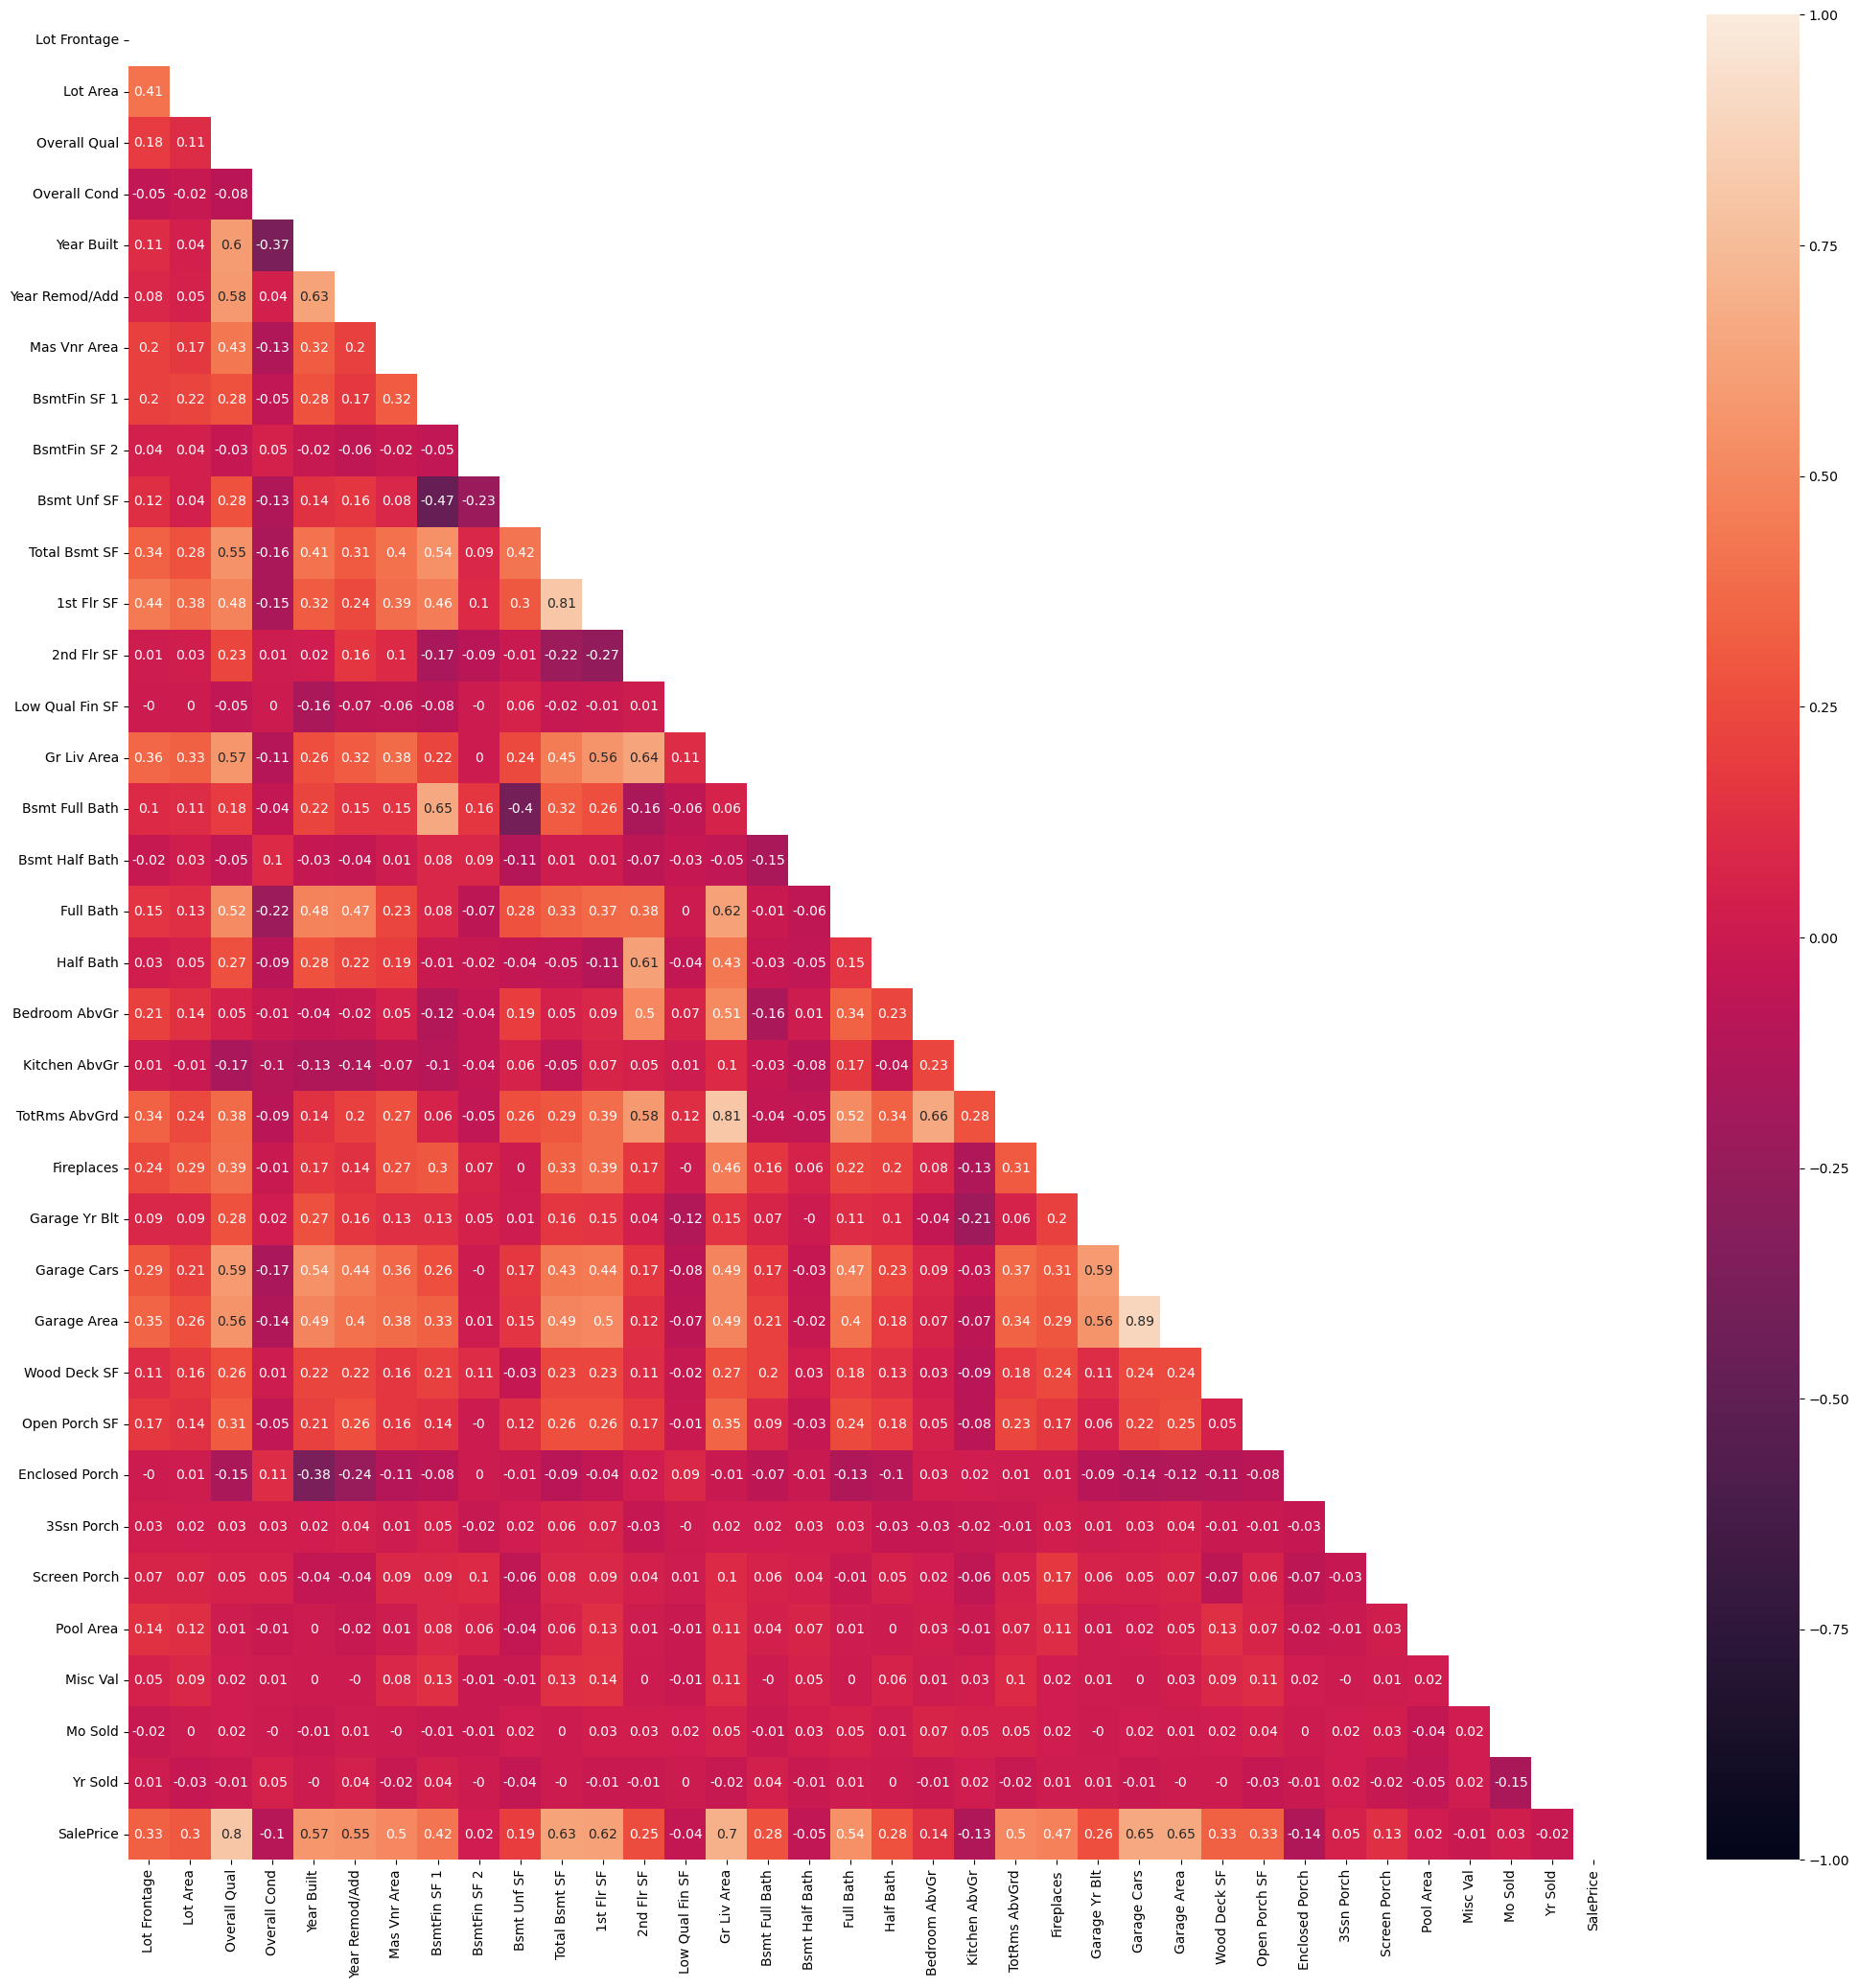

In [19]:
# Heatmap to examine correlation of all features

corr = train.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (25, 25))
sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, annot = True);

**There seems to be some features that highly correlate with each other.** Anything above 0.7 we won't use in our model to prevent multicollinearity.

---

C:\Users\Jason Lu\AppData\Local\Temp\ipykernel_21248\405424113.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice'),


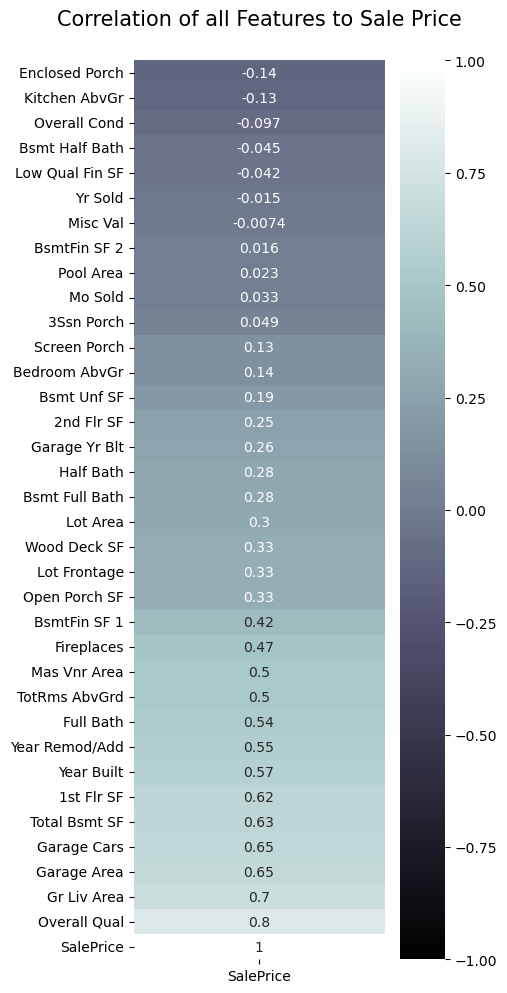

In [51]:
# Condensed heatmap to just see the correlation of all features to SalePrice
plt.figure(figsize = (5, 10))
sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice'),
            vmin = -1,
            vmax = 1,
            cmap = 'bone',
            annot = True);

plt.title('Correlation of all Features to Sale Price', fontsize = 15, y = 1.03)
plt.tight_layout()
plt.savefig('../imgs/correlation_final.png', bbox_inches = "tight")

plt.show()

From this plot, we can see that Overall Qual, Gr Liv Area, Garage Area, Total Bsmt SF, 1st Flr SF, and Year Built have the highest correlation with SalePrice.

We'll plot them in a pairplot to check for a linear correlation.

---

## Pairplot of Features with Highest Correlation

C:\Users\Jason Lu\AppData\Local\Temp\ipykernel_21248\3070387038.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


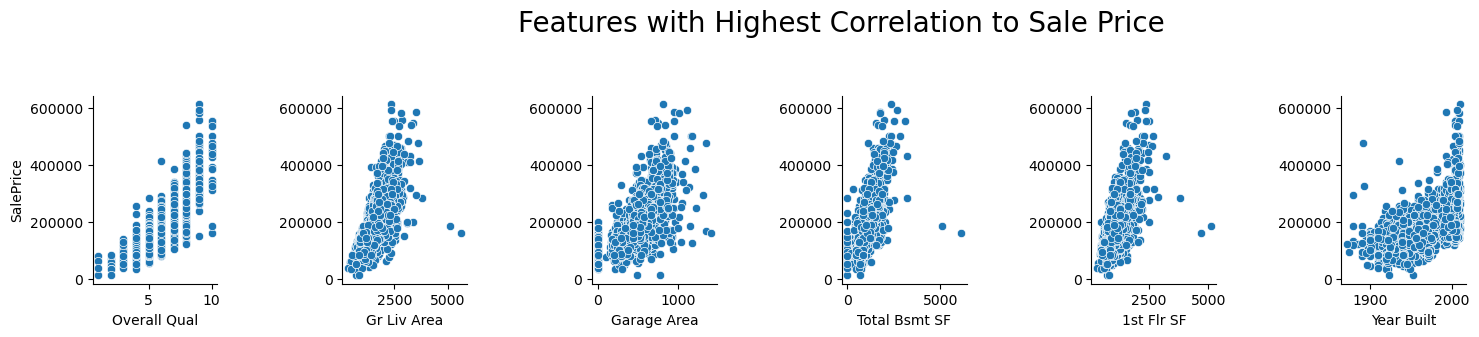

In [46]:
pp = sns.pairplot(train,
             x_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built'],
             y_vars = ['SalePrice']);

for ax in pp.axes.flat:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)  
    
plt.subplots_adjust(wspace=1, hspace=1)

plt.title('Features with Highest Correlation to Sale Price', x = -4, y = 1.3, fontsize=20)
plt.tight_layout()
plt.savefig('../imgs/pairplot.png', bbox_inches = "tight", dpi = 1000)
plt.show();

There appears to be a pretty strong linear correlation for all of them, especially in Overall Qual, Gr Liv Area, Total Bsmt SF, and 1st Flr SF.

These features will be used in the feature selection for our model.

---

## Read and Clean the Test Data

In [22]:
# Now let's clean the test data
test = pd.read_csv('../datasets/test.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [23]:
test.shape

(878, 80)

In [24]:
test.drop(columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], inplace=True)

test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,...,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,...,0,76,0,0,185,0,0,7,2009,WD


In [25]:
# select numerical columns
numerical_test = test.select_dtypes(include='number').columns
numerical_test

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [26]:
# apply function again for test
fill_numerical(test)
test[numerical_test].isnull().sum().sort_values(ascending=False)

Lot Frontage       1
Id                 0
Wood Deck SF       0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Open Porch SF      0
Full Bath          0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Half Bath          0
Bsmt Half Bath     0
PID                0
Bsmt Full Bath     0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Yr Sold            0
dtype: int64

In [27]:
# clean outliers for numerical 
numerical_col_list = list(numerical_test)
for col in numerical_col_list:
    test[col] = clean_outliers(test[col])
    
test[numerical_test].isnull().sum().sort_values(ascending=False)

Id                 0
Garage Area        0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Wood Deck SF       0
PID                0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Full Bath          0
Bsmt Half Bath     0
Bsmt Full Bath     0
Gr Liv Area        0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Yr Sold            0
dtype: int64

In [28]:
# select categorical columns
categorical_test = train.select_dtypes(include='object').columns
categorical_test

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

In [29]:
# apply function again to categorical
fill_categorical(test)

# Fill the one null value for electrical to None (might have a broken electrical system)
test['Electrical'].fillna('None', inplace = True)
test[categorical_test].isnull().sum().sort_values(ascending=False)

Id                0
PID               0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Exter Cond        0
Exter Qual        0
Mas Vnr Type      0
Land Slope        0
MS SubClass       0
MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Neighborhood      0
Exterior 2nd      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Sale Type         0
dtype: int64

In [30]:
train.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,69.381331,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,21.465067,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,70.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [31]:
# export cleaned data
train.to_csv('../datasets/train_cleaned.csv', index=False)
test.to_csv('../datasets/test_cleaned.csv', index=False)

## Initial Conclusions from EDA

Preliminarily, from the insights we've garnered during this EDA, we have seen that variables such as Overall Qual, Gr Liv Area, Garage Area, Total Bsmt SF, 1st Flr SF, and Year Built are likely to influence the relative price of any property. 

The degree of which they may play a role in predictive value of a house is yet to be seen. Likely, through our modeling process, we will develop a certainty for which qualities are the most important in the determination of its valuation.